In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 424.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 25.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This

In [ ]:
import pycaret
pycaret.__version__

'3.3.2'

In [ ]:
from pycaret.datasets import get_data
df = get_data('anomaly')

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754


In [ ]:
from pycaret.anomaly import *
setup_anomaly = setup(df, session_id = 101)

,Description,Value
0,Session id,101
1,Original data shape,"(1000, 10)"
2,Transformed data shape,"(1000, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
from pycaret.anomaly import AnomalyExperiment
anomaly_exp = AnomalyExperiment()

In [ ]:
anomaly_exp.setup(df, session_id = 101)

,Description,Value
0,Session id,101
1,Original data shape,"(1000, 10)"
2,Transformed data shape,"(1000, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
isolation_forest = create_model('iforest')
isolation_forest

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=101, verbose=0)

In [ ]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pycaret.internal.patches.pyod.CBLOFForceToDouble
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [ ]:
anomaly_results = assign_model(isolation_forest)
anomaly_results

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Anomaly,Anomaly_Score
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591,1,0.000659
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422,0,-0.073049
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600,1,0.019030
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463,1,0.070963
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754,0,-0.014927
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.305055,0.656837,0.331665,0.822525,0.907127,0.882276,0.855732,0.584786,0.808640,0.242762,0,-0.074269
996,0.812627,0.864258,0.616604,0.167966,0.811223,0.938071,0.418462,0.472306,0.348347,0.671129,0,-0.077809
997,0.250967,0.138627,0.919703,0.461234,0.886555,0.869888,0.800908,0.530324,0.779433,0.234952,0,-0.056883
998,0.502436,0.936820,0.580062,0.540773,0.151995,0.059452,0.225220,0.242755,0.279385,0.538755,0,-0.090477


In [ ]:
plot_model(isolation_forest, plot='tsne')

In [ ]:
evaluate_model(isolation_forest)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
iforest_predictions = predict_model(isolation_forest, data=df)
iforest_predictions

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Anomaly,Anomaly_Score
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591,1,0.000659
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422,0,-0.073049
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600,1,0.019030
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463,1,0.070963
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754,0,-0.014927
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.305055,0.656837,0.331665,0.822525,0.907127,0.882276,0.855732,0.584786,0.808640,0.242762,0,-0.074269
996,0.812627,0.864258,0.616604,0.167966,0.811223,0.938071,0.418462,0.472306,0.348347,0.671129,0,-0.077809
997,0.250967,0.138627,0.919703,0.461234,0.886555,0.869888,0.800908,0.530324,0.779433,0.234952,0,-0.056883
998,0.502436,0.936820,0.580062,0.540773,0.151995,0.059452,0.225220,0.242755,0.279385,0.538755,0,-0.090477


In [ ]:
save_model(isolation_forest, 'iforest_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Col1', 'Col2', 'Col3', 'Col4',
                                              'Col5', 'Col6', 'Col7', 'Col8',
                                              'Col9', 'Col10'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  IForest(behaviour='new', bootstrap=False, contamination=0.05,
     max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
     random_state=101, verbose=0))]),
 'iforest_pipeline.pkl')

In [ ]:
loaded_pipeline = load_model('iforest_pipeline')
loaded_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Col1', 'Col2', 'Col3', 'Col4',
                                             'Col5', 'Col6', 'Col7', 'Col8',
                                             'Col9', 'Col10'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=101, verbose=0))])

# 👇 Detailed function-by-function overview

## ✅ Setup
This function initializes the training environment and creates the transformation pipeline. The setup function must be called before executing any other function. It takes one mandatory parameter only: data. All the other parameters are optional.

In [ ]:
s = setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(1000, 10)"
2,Transformed data shape,"(1000, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [ ]:
# check all available config
get_config()

{'USI',
 'X',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables'}

In [ ]:
# lets access X_train_transformed
get_config('X_train_transformed')

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754
...,...,...,...,...,...,...,...,...,...,...
995,0.305055,0.656837,0.331665,0.822525,0.907127,0.882276,0.855732,0.584786,0.808640,0.242762
996,0.812627,0.864258,0.616604,0.167966,0.811223,0.938071,0.418462,0.472306,0.348347,0.671129
997,0.250967,0.138627,0.919703,0.461234,0.886555,0.869888,0.800908,0.530324,0.779433,0.234952
998,0.502436,0.936820,0.580062,0.540773,0.151995,0.059452,0.225220,0.242755,0.279385,0.538755


In [ ]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [ ]:
# help(setup)

In [ ]:
# init setup with bin_numeric_feature

s = setup(data, session_id = 123,
          bin_numeric_features=['Col1'])

,Description,Value
0,Session id,123
1,Original data shape,"(1000, 10)"
2,Transformed data shape,"(1000, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


<AxesSubplot:>

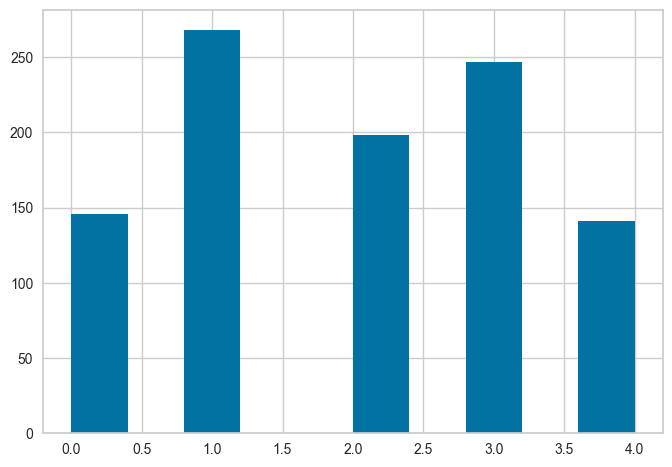

In [ ]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['Col1'].hist()

Notice that `Col1` originally was a numeric feature with a continuous distribution. After transformation it is now converted into categorical feature. We can also access non-transformed values using `get_config` and then compare the differences.

<AxesSubplot:>

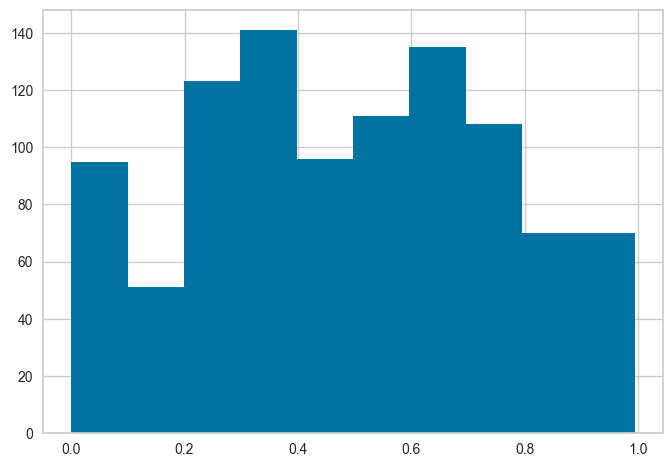

In [ ]:
get_config('X_train')['Col1'].hist()

## ✅ Experiment Logging
PyCaret integrates with many different type of experiment loggers (default = 'mlflow'). To turn on experiment tracking in PyCaret you can set `log_experiment` and `experiment_name` parameter. It will automatically track all the metrics, hyperparameters, and artifacts based on the defined logger.

In [ ]:
# from pycaret.anomaly import *
# s = setup(data, session_id = 123, log_experiment='mlflow', experiment_name='anomaly_project')

In [ ]:
# train iforest
# iforest = create_model('iforest')

In [ ]:
# start mlflow server on localhost:5000
# !mlflow ui

By default PyCaret uses `MLFlow` logger that can be changed using `log_experiment` parameter. Following loggers are available:
    
    - mlflow
    - wandb
    - comet_ml
    - dagshub
    
Other logging related parameters that you may find useful are:

- experiment_custom_tags
- log_plots
- log_data
- log_profile

For more information check out the docstring of the `setup` function.

In [ ]:
# help(setup)

## ✅ Create Model
This function trains an unsupervised anomaly detection model. All the available models can be accessed using the models function.

In [ ]:
# check all the available models
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pycaret.internal.patches.pyod.COFPatched
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [ ]:
# train iforest model
iforest = create_model('iforest')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
iforest

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)

In [ ]:
# train iforest with specific model parameter
create_model('iforest', contamination = 0.1)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)

In [ ]:
# help(create_model)

## ✅ Assign Model
This function assigns anomaly labels to the dataset for a given model. (1 = outlier, 0 = inlier).

In [ ]:
iforest_results = assign_model(iforest)
iforest_results

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Anomaly,Anomaly_Score
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591,0,-0.024763
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422,0,-0.083637
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600,1,0.021481
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463,1,0.044031
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754,0,-0.026150
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.305055,0.656837,0.331665,0.822525,0.907127,0.882276,0.855732,0.584786,0.808640,0.242762,0,-0.076718
996,0.812627,0.864258,0.616604,0.167966,0.811223,0.938071,0.418462,0.472306,0.348347,0.671129,0,-0.059275
997,0.250967,0.138627,0.919703,0.461234,0.886555,0.869888,0.800908,0.530324,0.779433,0.234952,0,-0.058574
998,0.502436,0.936820,0.580062,0.540773,0.151995,0.059452,0.225220,0.242755,0.279385,0.538755,0,-0.089169


In [ ]:
# help(assign_model)

## ✅ Plot Model

In [ ]:
# tsne plot of anomalies
plot_model(iforest, plot = 'tsne')

In [ ]:
# umap plot of anomalies (you need to install umap library for this separately)
# plot_model(iforest, plot = 'umap')

In [ ]:
# help(plot_model)

## ✅ Deploy Model
This function deploys the entire ML pipeline on the cloud.

**AWS:**  When deploying model on AWS S3, environment variables must be configured using the command-line interface. To configure AWS environment variables, type `aws configure` in terminal. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:

- AWS Access Key ID
- AWS Secret Key Access
- Default Region Name (can be seen under Global settings on your AWS console)
- Default output format (must be left blank)

**GCP:** To deploy a model on Google Cloud Platform ('gcp'), the project must be created using the command-line or GCP console. Once the project is created, you must create a service account and download the service account key as a JSON file to set environment variables in your local environment. Learn more about it: https://cloud.google.com/docs/authentication/production

**Azure:** To deploy a model on Microsoft Azure ('azure'), environment variables for the connection string must be set in your local environment. Go to settings of storage account on Azure portal to access the connection string required.
AZURE_STORAGE_CONNECTION_STRING (required as environment variable)
Learn more about it: https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?toc=%2Fpython%2Fazure%2FTOC.json

In [ ]:
# deploy model on aws s3
# deploy_model(iforest, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [ ]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

## ✅ Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [ ]:
# save model
save_model(iforest, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\owner\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Col1', 'Col2', 'Col3', 'Col4',
                                              'Col5', 'Col6', 'Col7', 'Col8',
                                              'Col9', 'Col10'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('bin_numeric_features',
                  TransformerWrapper(include=['Col1'],
                                     transformer=KBinsDiscretizer(encode='ordinal',
                                                                  strategy='kmeans'))),
                 ('trained_model',
                  IForest(behaviour='new', bootstrap=False, contamination=0.05,
     max_features=1.0, max_

In [ ]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\owner\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Col1', 'Col2', 'Col3', 'Col4',
                                             'Col5', 'Col6', 'Col7', 'Col8',
                                             'Col9', 'Col10'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('bin_numeric_features',
                 TransformerWrapper(include=['Col1'],
                                    transformer=KBinsDiscretizer(encode='ordinal',
                                                                 strategy='kmeans'))),
                ('trained_model',
                 IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0))])

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [ ]:
# save experiment
save_experiment('my_experiment')

In [ ]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,123
1,Original data shape,"(1000, 10)"
2,Transformed data shape,"(1000, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False
